In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pygraphon.graphons.StepGraphon import StepGraphon
import numpy as np
from pygraphon.plots.plot_matrices import spy
import matplotlib.pyplot as plt
from pygraphon.utils.utils_graph import edge_density
from tqdm import tqdm

In [4]:
#Set the matrix of theta
graphon_matrix = np.array([[0.8,0.1,0.1],[0.1,0.8,0.1],[0.1,0.1,0.8]])
#set up normalised graphon with graphon
graphon = StepGraphon(graphon_matrix,1/3)

In [5]:
#original integral and normalised one
print(graphon.integral(graphon_matrix), graphon.integral())

0.33333333333333337 1.0


In [6]:
#new graphon after normalisation
graphon.graphon

array([[2.4, 0.3, 0.3],
       [0.3, 2.4, 0.3],
       [0.3, 0.3, 2.4]])

In [7]:
from pygraphon.plots.plot_matrices import spy
import matplotlib.pyplot as plt

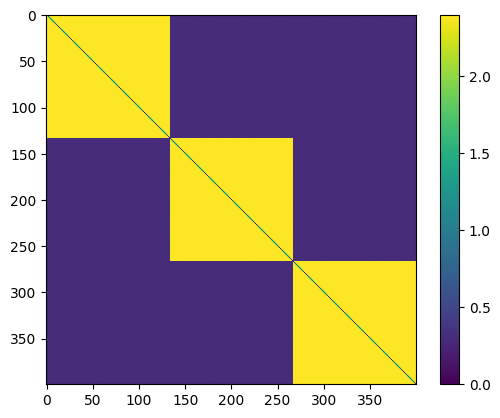

In [8]:
plt.imshow(graphon._get_edge_probabilities(400,False,True))
plt.colorbar()
plt.show()

In [9]:
#Draw a graph from the graphon with a given density and number of vertices, see GraphonAbstract.py
A = graphon.draw(rho = 0.3,n = 256, exchangeable=False)

In [10]:
fig, ax = spy(A)#from pygraphon.plots.plot_matrices
plt.show()

In [11]:
edge_density(A)

0.30183823529411763

In [12]:
from pygraphon.estimators.HistogramEstimator import HistogramEstimator
from pygraphon.estimators.MomentEstimator import MomentEstimator, SimpleMomentEstimator

In [13]:
hist = HistogramEstimator()
hist_epprox = hist.estimate(adjacency_matrix= A, bandwidthHist= None)

In [14]:
from pygraphon.plots.plots_graphon import plot
plot(hist_epprox)
plt.show()

In [15]:
from pygraphon.subgraph_isomorphism.CycleCount import CycleCount
counter = CycleCount(L = 9)

In [16]:
momentestimator = SimpleMomentEstimator(3)
mome_simple_approx = momentestimator.estimate(adjacency_matrix= A)

c:\Users\verdeyme\Desktop\Code\pygraphon\env\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [17]:
plot(mome_simple_approx)
plt.show()

In [18]:
mome_simple_approx.graphon

array([[2.43213977, 0.32087366, 0.32087366],
       [0.32087366, 2.43985872, 0.32087366],
       [0.32087366, 0.32087366, 2.20275955]])

In [19]:
mome_simple_approx.integral()

1.0

8

Clustering the tiles independently (i.e. without structure)

array([2.11185335, 2.65851839, 1.34364512, 0.29922718, 0.26470097,
       0.32512184, 0.29634999, 0.23912599, 2.42258927, 1.32350483,
       0.25319223, 0.34238494, 0.24456067, 0.26182378, 0.59781498,
       1.26596114, 1.33213638, 1.35803104, 0.29347281, 0.21291165,
       0.25543004, 2.30174752, 2.63550092, 0.25606941, 0.27045533,
       0.33151558, 2.18666015, 0.34526213, 0.25319223, 0.51086008,
       2.67002713, 2.38518587, 2.36408652, 2.17515141, 2.32060907,
       2.27894317])

In [147]:
from sklearn.cluster import KMeans
#Extract tiles and reshape
nrow_tile = hist_epprox.graphon.shape[0]
flat_graphon = hist_epprox.graphon[np.triu_indices(nrow_tile)]
#Clustering according to kmeans
max_k = int(nrow_tile*(nrow_tile+1)/2)#number of individual tile
avr_graphon = [flat_graphon.copy() for k in range(max_k)]#copies for different number of clusters
for i in range(max_k-1):
    if i==0:
        avr_graphon[i]=edge_density(A)*np.ones_like(flat_graphon)
    else:
        kmeans = KMeans(n_clusters=i+1, random_state=0).fit(flat_graphon.reshape(-1,1))
        #Smooth using mean by memberhsip
        for j in range(i+1):
            avr_graphon[i][kmeans.labels_==j] = flat_graphon[kmeans.labels_==j].mean()

array([0.25114623, 0.31904778, 0.51086008, 0.59781498, 1.26596114,
       1.33932934, 2.11185335, 2.18090578, 2.30043325, 2.39062055,
       2.65468214])